## **Lumpy Skin Disease** 

Lumpy skin disease is an infectious, eruptive, occasionally fatal disease of cattle characterized by nodules on the skin and other parts of the body. Secondary bacterial infection often aggravates the condition. Traditionally, lumpy skin disease is found in southern and eastern Africa, but in the 1970s it extended northwest through the continent into subSaharan west Africa. Since 2000, it has spread to several countries of the Middle East and in 2013 extended west into Turkey and several countries in the Balkans. More recently, outbreaks of lumpy skin disease were reported for the first time in Georgia, Russia, Bangladesh, and the People's Republic of China. The recent geographic spread of lumpy skin disease has caused international concern. The disease has not been recorded in the Western hemisphere or in Australia or New Zealand.

## **Load libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

## **Discover of Data**

In [2]:
data = pd.read_csv('/kaggle/input/lumpy-skin-disease-dataset/Lumpy skin disease data.csv')
data.sample(10)

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
14111,121.750000,55.250000,NaN,NaN,NaN,56.7,12.6,31.00,0.0,1.9,-36.2,-29.9,-23.6,0.4,1.61,178,4,22.355144,0.000449,0
24619,22.250000,-12.250000,NaN,NaN,NaN,80.0,11.9,0.00,3.2,222.0,17.1,23.0,29.0,20.4,19.00,181,5,0.000000,0.000000,0
2365,36.026645,37.333899,Asia,Turkey,22/07/2014,65.9,6.8,5.85,1.1,140.5,4.8,8.2,11.6,6.9,13.17,145,2,1327.207178,0.241124,1
5807,76.250000,70.750000,NaN,NaN,NaN,82.3,7.0,31.00,0.0,27.1,-25.7,-22.2,-18.7,1.1,19.50,147,3,0.002725,0.001836,0
21128,69.250000,22.250000,NaN,NaN,NaN,13.9,12.2,0.00,3.8,0.2,14.5,20.6,26.7,13.0,0.00,147,2,1396.175663,889.601689,0
4440,52.750000,21.750000,NaN,NaN,NaN,39.0,8.3,0.00,3.6,0.0,16.8,20.9,25.1,15.8,0.00,153,9,3.811287,0.000000,0
13963,47.750000,55.250000,NaN,NaN,NaN,71.3,5.9,31.00,0.1,50.9,-15.0,-12.0,-9.1,2.2,23.73,159,2,782.033557,0.000909,0
16020,79.250000,50.750000,NaN,NaN,NaN,49.7,9.9,31.00,0.1,5.8,-26.0,-21.0,-16.1,1.1,4.53,157,4,160.252479,0.002259,0
22583,91.750000,38.750000,NaN,NaN,NaN,35.2,15.1,31.00,0.9,0.0,-22.4,-14.8,-7.3,0.0,0.00,185,9,25.771191,0.000000,0
13533,60.750000,56.250000,NaN,NaN,NaN,63.0,7.2,31.00,0.1,9.8,-19.5,-15.9,-12.3,1.6,4.91,160,4,188.114190,0.000026,0


In [3]:
data.columns

Index(['x', 'y', 'region', 'country', 'reportingDate', 'cld', 'dtr', 'frs',
       'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation',
       'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da', 'lumpy'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [5]:
data.isnull().sum().sort_values()

x                          0
X5_Ct_2010_Da              0
dominant_land_cover        0
elevation                  0
wet                        0
vap                        0
tmx                        0
tmp                        0
tmn                        0
pre                        0
pet                        0
frs                        0
dtr                        0
cld                        0
y                          0
X5_Bf_2010_Da              0
lumpy                      0
reportingDate          21764
country                21764
region                 21764
dtype: int64

## **Perare of Data**

In [6]:
data.drop_duplicates()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,NaN,NaN,NaN,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000,0
24799,20.750000,-16.750000,NaN,NaN,NaN,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000,0
24800,21.250000,-16.750000,NaN,NaN,NaN,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000,0
24801,21.750000,-16.750000,NaN,NaN,NaN,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000,0


In [7]:
data.drop(columns=['reportingDate','region','country'],inplace=True,axis=1)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x,24803.0,79.221374,43.338530,-179.75,45.083150,80.750000,109.750000,179.75000
y,24803.0,46.370056,19.220555,-28.75,34.750000,48.250000,61.750000,81.75000
cld,24803.0,59.452159,19.423029,0.00,43.800000,62.300000,75.300000,98.70000
dtr,24803.0,9.107777,2.988448,2.00,6.800000,8.300000,11.100000,20.60000
frs,24803.0,23.978048,11.518315,0.00,23.210000,31.000000,31.000000,31.00000
pet,24803.0,0.803487,1.172915,0.00,0.000000,0.200000,1.100000,7.50000
pre,24803.0,26.271137,33.630747,0.00,5.900000,14.700000,33.400000,341.90000
tmn,24803.0,-15.794755,17.587685,-52.10,-30.100000,-19.100000,-2.200000,23.90000
tmp,24803.0,-11.227807,17.989715,-48.10,-25.500000,-14.200000,1.400000,28.50000
tmx,24803.0,-6.681212,18.540915,-44.20,-20.900000,-9.700000,4.900000,36.40000


## **Know about Data**



([<matplotlib.patches.Wedge at 0x7bb07a120490>,
 [Text(-1.01950915259187, 0.41303884536615587, '0'),
  Text(1.019509133256125, -0.41303889309282343, '1')],
 [Text(-0.5560959014137472, 0.22529391565426682, '87.7%'),
  Text(0.5560958908669772, -0.22529394168699457, '12.3%')])

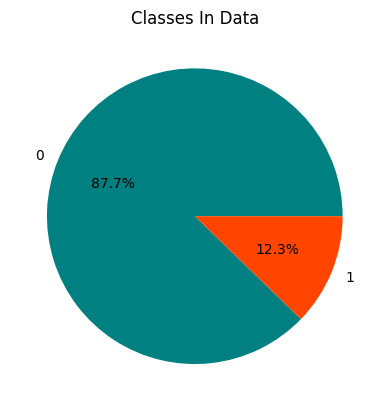

<Figure size 600x300 with 0 Axes>

In [9]:
labels = [0,1]
sizes = data['lumpy'].value_counts()
fig, ax = plt.subplots()
plt.title('Classes In Data')
plt.figure(figsize=(6, 3))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#008080','#FF4500'])

<Axes: title={'center': 'Elevation'}, xlabel='Elevation', ylabel='Frequences'>

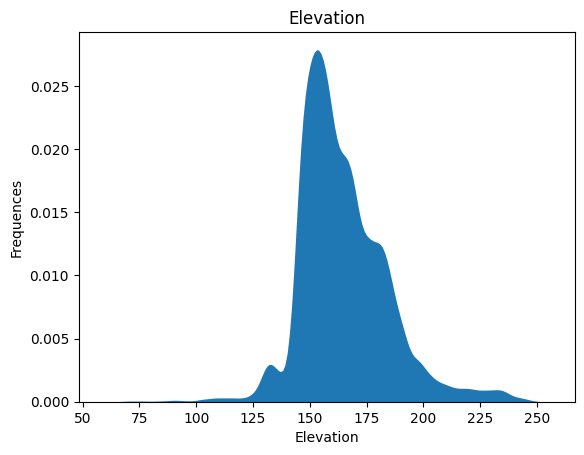

In [10]:
plt.title('Elevation')
plt.xlabel('Elevation')
plt.ylabel('Frequences')
sns.kdeplot(data, x="elevation",fill=True, common_norm=False,alpha=1, linewidth=0)

<Axes: title={'center': 'Dominant Land Cover'}, xlabel='Dominant Land Cover', ylabel='Frequences'>

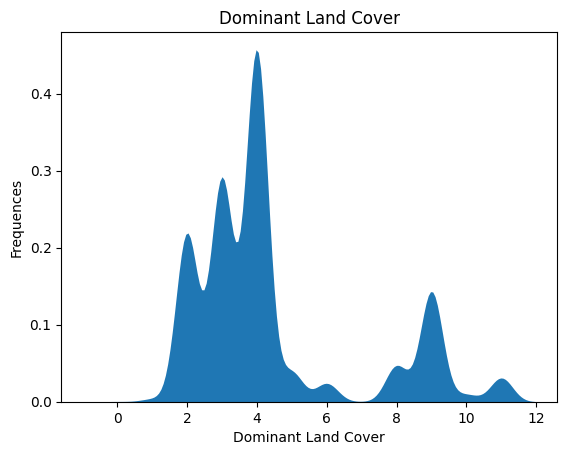

In [11]:
plt.title('Dominant Land Cover')
plt.xlabel('Dominant Land Cover')
plt.ylabel('Frequences')
sns.kdeplot(data, x="dominant_land_cover",fill=True, common_norm=False,alpha=1, linewidth=0)

<Axes: title={'center': 'cld'}, xlabel='cld', ylabel='Frequences'>

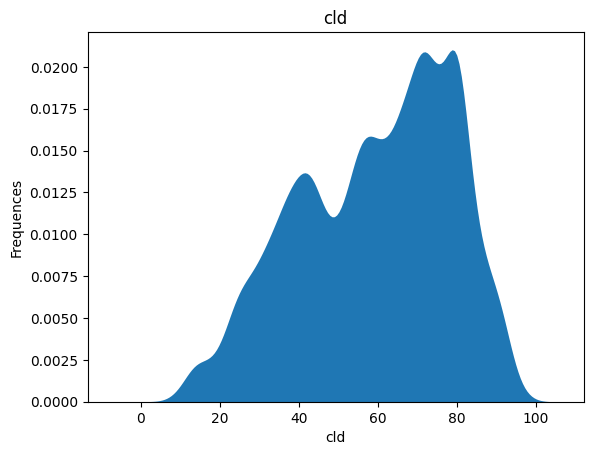

In [12]:
plt.title('cld')
plt.xlabel('cld')
plt.ylabel('Frequences')
sns.kdeplot(data, x="cld",fill=True, common_norm=False,alpha=1, linewidth=0)

<Axes: >

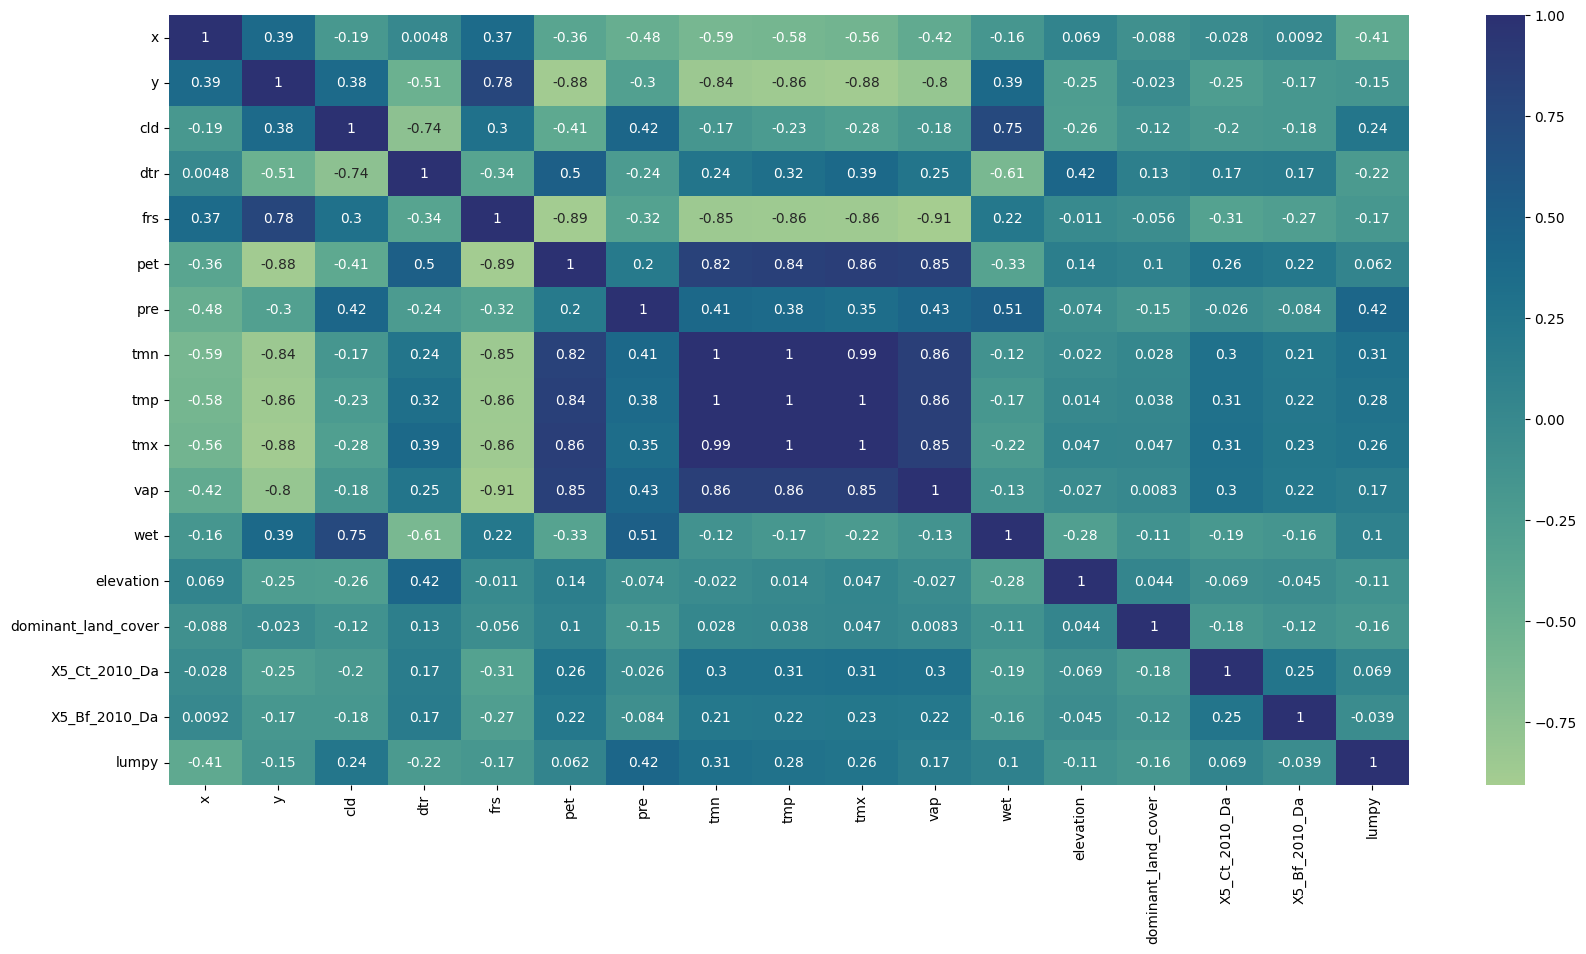

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap="crest")

## **Data Splitting**

In [14]:
y = data['lumpy']
x =  data.drop(columns=['lumpy'],axis=1)
x_train , x_val , y_train , y_val = train_test_split(x,y,test_size=0.2  ,random_state=41)
print('-'*15,'in trainning Data :','-'*15,'\nShape of X :\t',x_train.shape ,'\nShape of Y :\t',y_train.shape)
print('-'*15,'in validation Data :','-'*15,'\nShape of X :\t',x_val.shape ,'\nShape of Y :\t',y_val.shape)

--------------- in trainning Data : --------------- 
Shape of X :	 (19842, 16) 
Shape of Y :	 (19842,)
--------------- in validation Data : --------------- 
Shape of X :	 (4961, 16) 
Shape of Y :	 (4961,)


## **Scalling**

In [15]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val= scaler.fit_transform(x_val)

## **Build Model**

In [16]:
def model(model,x_train,x_val,y_train,y_val):
  model.fit(x_train,y_train)
  y_prediction = model.predict(x_train)
  print('-'*55)
  print('Accuarcy in Trainning : ',model.score(x_train,y_train))
  print('-'*55)
  print('Accuarcy in Validation : ',model.score(x_val,y_val))
  print('-'*55)
  print(classification_report(y_train , y_prediction))
  print('-'*55)

## **Voting Model**

In [17]:
# Models
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
cat = CatBoostClassifier()
# Voting
voting_models = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('ada',ada),('cat',cat)], voting='soft')
model(voting_models,x_train,x_val,y_train,y_val)

Learning rate set to 0.036898
0:	learn: 0.6284794	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.5743535	total: 68.8ms	remaining: 34.4s
2:	learn: 0.5163896	total: 75.4ms	remaining: 25.1s
3:	learn: 0.4742157	total: 82.2ms	remaining: 20.5s
4:	learn: 0.4345922	total: 88.9ms	remaining: 17.7s
5:	learn: 0.4010777	total: 95.8ms	remaining: 15.9s
6:	learn: 0.3713381	total: 102ms	remaining: 14.5s
7:	learn: 0.3453498	total: 109ms	remaining: 13.5s
8:	learn: 0.3238515	total: 116ms	remaining: 12.7s
9:	learn: 0.2994157	total: 122ms	remaining: 12.1s
10:	learn: 0.2832437	total: 129ms	remaining: 11.6s
11:	learn: 0.2654458	total: 136ms	remaining: 11.2s
12:	learn: 0.2517168	total: 142ms	remaining: 10.8s
13:	learn: 0.2374849	total: 149ms	remaining: 10.5s
14:	learn: 0.2264814	total: 157ms	remaining: 10.3s
15:	learn: 0.2143278	total: 163ms	remaining: 10s
16:	learn: 0.2046070	total: 170ms	remaining: 9.83s
17:	learn: 0.1962459	total: 177ms	remaining: 9.64s
18:	learn: 0.1896689	total: 185ms	remaining: 9.55s
19:	lea